In [1]:
%matplotlib inline

from pprint import pprint
import random

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import YouTubeVideo

# The Source Code of Life: Using Python to Explore Our DNA
![xkcd_dna](images/dna.png)
Researchers just found the gene responsible for mistakenly thinking we've found the gene for specific things. It's the region between the start and the end of every chromosome, plus a few segments in our mitochondria.

Every good presentation starts with xkcd, right?

## Bioinformatics
HINT: If you're viewing this notebook as slides, press the "s" key to see a bunch of extra notes.
![dna_code](images/dna_code.jpg)
Image: http://www.sciencemag.org/sites/default/files/styles/article_main_large/public/images/13%20June%202014.jpg?itok=DPBy5nLZ

Today we're going to talk about part off the wonderful field of study known as bioinformatics. What is bioinformatics? According to [Wikipedia](https://en.wikipedia.org/wiki/Bioinformatics), its "an interdisciplinary field that develops methods and software tools for understanding biological data." Here's another definition that more fits my experiences: "The mathematical, statistical and computing methods that aim to solve biological problems using DNA and amino acid sequences and related information." ([Fredj Tekaia](http://slideplayer.com/slide/4800050/), Institut Pasteur)

## What is DNA?
A long string of A, C, G, and T (bases)

    ACGTTCATGG           <- Ten bases

    ACGTTCATGGATGTGACCAG <- Twenty bases

    etc...

So what is it about biology that needs such computationally intensive stuff? I thought biology was a "squishy" science? Well guess what, nature has been playing with big data long before it became the buzzword it is now. Let's start by talking about DNA. DNA is your "source code," but we'll get to more about how that works in a minute. First we're just going to talk about what it is. It's a string of four different types of molecules with long names that we're not going to worry about right now, so we'll just call them by their abbreviations (which is what everyone uses most of the time anyway): `A`, `C`, `G`, and `T`. And instead of molecules, we'll call them bases, because reasons. So if you have just an `A`, that's one base, or if you have `ACGTTCATGG`, that is ten bases.

Well, not really a string...
<img src="images/double_helix.jpg" alt="Double helix" style="width: 200px;"/>
Two strings stuck together? But if you know one you know the other...

Ok, when I said it was a string that was a bit of a simplification, it's actually two strings stuck together. That's why pictures of DNA look like a twisted ladder (that's the "double helix" you may hear about): each side of the ladder is a string, and the "rungs" are where they stick together. But the nice thing is, each base has only one other base it can stick to. `A` always sticks to `T` and vice versa, same with `C` and `G`. So if you know that one side of the ladder is `ACGTTCATGG`, then we know the other side is `TGCAAGTACC`. This is really nice because it cuts the amount of information we actually have to know in half.

## The Human Genome
It's big. How big?

So now that you know everything (just kidding) about DNA, it's time for a question: How many bases long would you guess the human genome (fancy word for all the DNA) is? It ends up being about 3.2 billion base pairs long. (Remember the double helix? That's why it's _pairs_)

About 3,200,000,000bp (bp is base pairs). Actual file format commonly used in bioinformatics (FASTA):

```
>Sequence0
TTTCTGACTAACACTACAATTACCACTTGATGTTACCGACTAAGTGGTACGACTTGCTAGAACCGACTCTCGTACGTAT
CGCAGACTAGTGCGCGCGCTTAGTGACTATACTAGAATATACCTGGGGCCCAAGGAGTGTCGGGCGATCGTCCTTGAAA
TAAATATCTCAACCATCGTCATCTAGGGGGAACAGAGCGGTGGGCAGGTCCCAACCTGTTTATTTGTGTTGCTAACACT
ACGGCGCAGCTGCTCAAGTAGGTGCGATTATCGAGTAGAGGCTCCACCGGCTCTATGTGCCACGCATCTACTGAACCGA
ATTCTATCCCTGATACTCCAGAAGGTCGCAGGTTTACAGACACGTTTCAGCTCGAGAGGCCATCGATTATCTTAATATA
CCACACTGCCGAATAGCATGCCCGTAGAATCCAAGCCACGAGATAGCGTTACTTAATGAGTACCCAACGCAAATGAGGT
TGATTATCCCTAACCTGCAATCTAGGCCTTGTTCTGGAGGGGGTTATCCTTTATAGTTGATTACTTACACTCACCATGT
TCGTAGTCGGAACTCACCGATTAAGACCGATTTTACTATGGGAAGGCCAGGTTACACCTGTTTCGGGGGGGCCGCGGCG
GGTTACTTTAACCTGTCCATCCATCAGTCACTGGGCGCCAAGATTCTCCTATAGTTATATCCGCCCTTTGATTTAAACC
TAGGCCTACCTCAACGAACTGGGCCATGGGGTTCACACAGAAACAAGGGGGATAGACAGTCTTATTGAGCGCTTCTGAA
CAGCGTGTGTTCACGGTACGGCAATACCACCAGTAAACCGAGAACAGTGTTGAAGGTGATCGAACACGTGTTTTCTTCA
CCGTAGGGCTTCTAGGGAGTATCGCCCCCATATAGGCAGACGAGAAGGACTGTCACGCGCGGAGATCGATAATACGTAT
AACACAAGCACAGTAACTGCCCCGACCGGCTAAAGGACGTGGCCCAGTGTACCCAACGTACGTAATTGCAAGAGGTCTG
TCTGTCATCCCGAGGACTGCTTCTATAACTCGTTGAGGGCACTAGGCTTGAGACAATCAGCTTCGCTCGTCACGATTTT
ACTTTTTTCCTGGAAAAGCCCCCCCACAGACTATCAGGTCGCGCTTACCATACCAGTCCTTCTTGATAAGCCAATCCGT
ATTAGGTAGATTAAGCTGACAGTCGGGGCGACTCTTTGGAAACAGTATTCCCGTTTCGGGCACCTAGGATTCAGGCTTG
TACAACGATCATAGACGTCGCGGAAAGAAATAGCACAGTGTAGGAGCTGGTCGTGACCCGTGCTGTCAAGTTTATTGCA
CGGCTTGCTAAAAGGTACAGTGTAACGTTTCACAAACAAGCGAGACCCATTGTTGGTCTAACGCTATCGTACTTGATAC
CAGCCTGTGACGTCACGCGAAATCGTCTGTATAACTAGTTCTTCCCCGACTGCCACGGTATCCCAAAATTACATACTGA
CAGGACCTCTTCCATATTCATCAGGACTCGACGAAGCGCGCCCCGTGTAGTACGCGAAAATTATACCGTCCGTAGGTAC

```
Now picture this 2 million more times. 

If you wrapped it in PEP 8-guideline adhering lines of 79 characters, it would still be over 40 million lines (although granted DNA is about as un-Pythonic of code as you can get). And we're not even all that special when it comes to genome length. A lot of plants have us beat, actually, with _paris japonica_ being a [top contender](http://blogs.biomedcentral.com/on-biology/2014/03/20/worlds-largest-sequenced-genome-unlocking-the-loblolly-pine/) for longest genome at 150 billion base pairs.

So what does all of that code even do? Well, most of it doesn't appear to "do" much. (How much code in your codebase is like that? Although I'd be willing to bet there's a lot of it that we just don't understand what it does yet) But we'll stick with the ~1.5% of it that we have a pretty good idea about.

![central_dogma](images/Central_Dogma_of_Molecular_Biochemistry_with_Enzymes.jpg)
https://en.wikipedia.org/wiki/Central_dogma_of_molecular_biology

It's time to learn something called "The Central Dogma of Molecular Biology," since that's a lot cooler-sounding than "what DNA does." Don't worry, we'll keep to the very basics. There are two steps, "transcription" and "translation." Transcription basically involves making a copy of a chunk of DNA, except that you only copy one side of it (it looks like half a strand of DNA). We call this copy RNA. Translation involves reading the pattern of the DNA into protein. What is protein? Basically most of what we're made of is either protein or is made by proteins (excluding water, of course). So that's basically how your source code works: your DNA tells your body how to make proteins, which are like parts of a machine. These little parts make little machines, which are part of bigger machines, etc. etc. until all the parts fit together to make you! (But how do the parts know how to fit together you ask? Umm...great question...that we're not going to cover today. Next slide!)

## Sequencing DNA

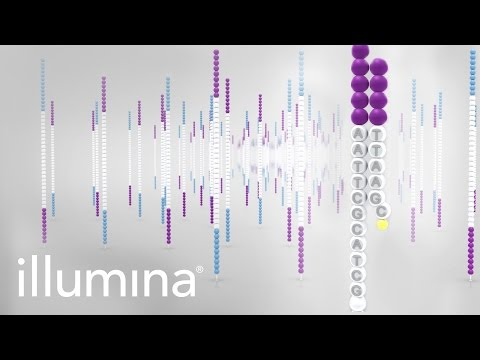

In [2]:
YouTubeVideo('fCd6B5HRaZ8', start=135)

Ok, now you know something about DNA, so we can start getting into some of the fun puzzles that this leads to. So how do we find out what someone's DNA sequence is? There are several methods, including some newer ones that I'm really excited about, but we'll stick with the most popular here: Illuimina's sequencing by synthesis. It's probably so popular because it's fast and keeps getting cheaper. The reason it's so fast is because it's parallelized. It works by breaking the DNA up into little chunks and then looking at all the chunks at the same time. Basically you have a whole bunch of these fragments on a slide and then flood the slide with a whole bunch of one base (say A). The base is modified slightly so that it fluoresces a certain color when illuminated by a certain wavelength and also so that no other bases can attach after it. Then the excess bases are washed off, the slide is imaged to see which fragments got a base added, and then the fluorescent part of the new addition as well as the part that blocks the next base are removed and the process is repeated with another base (say C). Repeat until you've got most of the fragments.

## Sequence Alignment
Now things start to get fun

That's a nice-looking lake...
![lake](images/lake.jpg)

Until now!
![lake_puzzle](images/lake_puzzle.png)

So now you've got a whole bunch of little pieces of DNA that you have to match up to a reference sequence. A quick analogy (credit for the analogy/pics to Aaron Quinlan, who has [all his slides](https://github.com/quinlan-lab/applied-computational-genomics) for a course in applied computational genomics freely available). What makes this lake puzzle so hard? So much blue and white! So we need to find a way to determine how well the piece we have actually matches the picture at that point. We'll call this aligning sequences.

### First step: Assign scores
If a base matches with itself, it gets a score of one. Otherwise it gets a score of zero.

||A|C|G|T|
|-|-|-|-|-|
|__A__|1|0|0|0|
|__C__|0|1|0|0|
|__G__|0|0|1|0|
|__T__|0|0|0|1|

So these two sequences:
```
AACTGTGGTAC
ACTTGTGGAAC
10011111011
```
have an alignment score of eight.

This is going to seem like complete overkill at first, but you'll understand the advantages to doing it this way after a bit. Each base that aligns with itself gets a score of one, any other alignment is zero. But what if these are long segments, could we maybe get a better score by shifting one in reference to another? That's a valid question, but before we can tackle that, I need to introduce you to another unfortunate aspect of sequencing...

### What about gaps?
Yes, unfortunately there are going to be gaps.

We'll add a "gap penalty" of -3.

So the score for this alignment:
```
ACTACA-ACGTTGAC
A-TAGAAACGCT-AC
1 1101 11101 11
-3   -3    -3
```
is just one


Sequencing DNA is great, but it's also kind of messy. You may end up with extra bases or missing bases in your sequences. Also, people don't all have the same DNA (unless you're identical twins!) so you may have bases that are actually missing or extra with respect to the "reference" sequence. But, gaps are problematic because when they're in a place that codes for a protein (remember earlier?) they are pretty good at making the protein not work. So we want to introduce gaps only when it's a lot better than the alternative. For now we'll have a "gap penalty" of -3.

### Scoring matrix

||-|A|C|G|T|T|T|G|T|C|G|C|
|-|
|__-__|0|-3|-6|-9|-12|-15|-18|-21|-24|-27|-30|-33|
|__A__|-3||||||||||||
|__C__|-6||||||||||||
|__T__|-9||||||||||||
|__T__|-12||||||||||||
|__T__|-15||||||||||||
|__C__|-18||||||||||||
|__T__|-21||||||||||||
|__G__|-24||||||||||||
|__C__|-27||||||||||||

$$
S_{m,n}=\left\{
  \begin{array}{ll}
    S_{m-1,n} + gap\\
    S_{m,n-1} + gap\\
    S_{m-1,n-1} + B(a,b)\\
  \end{array}
\right.
$$

||-|A|C|G|T|T|T|G|T|C|G|C|
|-|
|__-__|0|-3|-6|-9|-12|-15|-18|-21|-24|-27|-30|-33|
|__A__|-3|1|-2|-5|-8|-11|-14|-17|-20|-23|-26|-29|
|__C__|-6||||||||||||
|__T__|-9||||||||||||
|__T__|-12||||||||||||
|__T__|-15||||||||||||
|__C__|-18||||||||||||
|__T__|-21||||||||||||
|__G__|-24||||||||||||
|__C__|-27||||||||||||

We need to keep track of where that score came from.

||-|A|C|G|T|T|T|G|T|C|G|C|
|-|
|__-__|0|←-3|←-6|←-9|←-12|←-15|←-18|←-21|←-24|←-27|←-30|←-33|
|__A__|↑-3|↖1|←-2|←-5|←-8|←-11|←-14|←-17|←-20|←-23|←-26|←-29|
|__C__|↑-6||||||||||||
|__T__|↑-9||||||||||||
|__T__|↑-12||||||||||||
|__T__|↑-15||||||||||||
|__C__|↑-18||||||||||||
|__T__|↑-21||||||||||||
|__G__|↑-24||||||||||||
|__C__|↑-27||||||||||||

||-|A|C|G|T|T|T|G|T|C|G|C|
|-|
|__-__|0|←-3|←-6|←-9|←-12|←-15|←-18|←-21|←-24|←-27|←-30|←-33|
|__A__|↑-3|↖1|←-2|←-5|←-8|←-11|←-14|←-17|←-20|←-23|←-26|←-29|
|__C__|↑-6|↑-2|↖2|←1|←-4|←-7|←-10|←-13|←-16|↖-19|←-22|↖-25|
|__T__|↑-9|↑-5|↑-1|↖2|↖0|←-3|←-6|←-9|←-12|←-15|←-18|←-21|
|__T__|↑-12|↑-8|↑-4|↑-1|↖3|↖1|←-2|←-5|↖-8|←-11|←-14|←-17|
|__T__|↑-15|↑-11|↑-7|↖-4|↑0|↖4|↖2|←-1|↖-4|←-7|←-10|←-13|
|__C__|↑-18|↑-14|↖-10|↖-7|↑-3|↑1|↖4|↖2|↖-1|↖-3|←-6|←-9|
|__T__|↑-21|↑-17|↑-13|↑-10|↑-6|↑-2|↖2|↖4|↖3|←0|↖-3|←-6|
|__G__|↑-24|↑-20|↑-16|↖-12|↑-9|↑-5|↑-1|↖3|↖4|↖3|↖1|←-2|
|__C__|↑-27|↑-23|↖-19|↑-15|↖-12|↑-8|↑-4|↑0|↖3|↖5|↖3|↖2|

Now just follow the arrows from that bottom-right corner back to the top-left zero.
```
ACGTTTGTCGC
|| ||| | ||
AC-TTTCT-GC

```

So how do we keep track of where we actually want gaps? We will use a scoring matrix. We start out with one sequence at the top and one on the side with an extra space added at the beginning of each. The two spaces align with a score of zero and we start form there. Each cell gets filled in with whatever ends up the highest of three possibilities:
1. The score above plus the gap penalty (remember the gap penalty is negative)
2. The score to the left plus the gap penalty
3. The score to the upper left plus the alignment score

We can fill in the top and left columns right away since they don't have a score to their upper-left, so their only possible score is the gap penalty.

But our choice affects the score of everything down and to the right, so besides just the score, we need to keep track of where that score came from.

Once it's all filled out, just follow the arrows from the bottom-right corner to the top-left zero. Every time you go straight up, it's a gap in the left sequence. Every time you go left it's a gap in the top sequence. Every time you go up-left, the two bases align.

### Let's code this!
See _Python for Bioinformatics_ for the inspiration for this demo.

Here is the "substitution matrix" and its corresponding "alphabet":

In [3]:
dna_sub_mat = np.array(
    [[ 1, 0, 0, 0],
     [ 0, 1, 0, 0],
     [ 0, 0, 1, 0],
     [ 0, 0, 0, 1]])

dbet = 'ACGT'

Same as we defined above, with `dbet` being the "dna alphabet" used for this matrix (four-letter alphabet, could be in a different order, this is just the one we chose)

And here are we calculate the scores and arrows as separate matrices

In [4]:
def nw_alignment(sub_mat, abet, seq1, seq2, gap=-8):
    # Get the lengths of the sequences
    seq1_len, seq2_len = len(seq1), len(seq2)
    # Create the scoring and arrow matrices
    score_mat = np.zeros((seq1_len+1, seq2_len+1), int)
    arrow_mat = np.zeros((seq1_len+1, seq2_len+1), int)
    # Fill first column and row of score matrix with scores based on gap penalty
    score_mat[0] = np.arange(seq2_len+1) * gap
    score_mat[:,0] = np.arange(seq1_len+1) * gap
    # Fill top row of arrow matrix with ones (left arrow)
    arrow_mat[0] = np.ones(seq2_len+1)
    for seq1_pos, seq1_letter in enumerate(seq1):
        for seq2_pos, seq2_letter in enumerate(seq2):
            f = np.zeros(3)
            # Cell above + gap penalty
            f[0] = score_mat[seq1_pos,seq2_pos+1] + gap
            # Cell to left + gap penalty
            f[1] = score_mat[seq1_pos+1,seq2_pos] + gap
            n1 = abet.index(seq1_letter)
            n2 = abet.index(seq2_letter)
            # Cell to upper-left + alignment score
            f[2] = score_mat[seq1_pos,seq2_pos] + sub_mat[n1,n2]
            score_mat[seq1_pos+1, seq2_pos+1] = f.max()
            arrow_mat[seq1_pos+1, seq2_pos+1] = f.argmax()
    return score_mat, arrow_mat

I'm calling this `nw_align` after the Needleman-Wunsch algorithm. It's hard to put score and directional information in just one matrix, so we make two matrices. We start with a matrix of zeros for each and then fill them in concurrently as we run through the possibilities.

What does our result look like?

In [5]:
s1 = 'ACTTCTGC'

s2 = 'ACGTTTGTCGC'

score_mat, arrow_mat = nw_alignment(dna_sub_mat, dbet, s1, s2, gap=-3)
print(score_mat)
print(arrow_mat)

[[  0  -3  -6  -9 -12 -15 -18 -21 -24 -27 -30 -33]
 [ -3   1  -2  -5  -8 -11 -14 -17 -20 -23 -26 -29]
 [ -6  -2   2  -1  -4  -7 -10 -13 -16 -19 -22 -25]
 [ -9  -5  -1   2   0  -3  -6  -9 -12 -15 -18 -21]
 [-12  -8  -4  -1   3   1  -2  -5  -8 -11 -14 -17]
 [-15 -11  -7  -4   0   3   1  -2  -5  -7 -10 -13]
 [-18 -14 -10  -7  -3   1   4   1  -1  -4  -7 -10]
 [-21 -17 -13  -9  -6  -2   1   5   2  -1  -3  -6]
 [-24 -20 -16 -12  -9  -5  -2   2   5   3   0  -2]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [0 2 1 1 1 1 1 1 1 1 1 1]
 [0 0 2 1 1 1 1 1 1 1 1 1]
 [0 0 0 2 2 1 1 1 1 1 1 1]
 [0 0 0 0 2 2 1 1 1 1 1 1]
 [0 0 0 0 0 2 2 1 1 2 1 1]
 [0 0 0 0 0 2 2 1 2 1 1 1]
 [0 0 0 2 0 0 0 2 1 1 2 1]
 [0 0 0 0 0 0 0 0 2 2 1 2]]


Looks good, but not all that useful by itself.

Now we need a way to get the sequences back out of our scoring matrix:

In [6]:
def backtrace(arrow_mat, seq1, seq2):
    align1, align2 = '', ''
    align1_pos, align2_pos = arrow_mat.shape
    align1_pos -= 1
    align2_pos -= 1
    selected = []
    while True:
        selected.append((align1_pos, align2_pos))
        if arrow_mat[align1_pos, align2_pos] == 0:
            # Up arrow, add gap to align2
            align1 += seq1[align1_pos-1]
            align2 += '-'
            align1_pos -= 1
        elif arrow_mat[align1_pos, align2_pos] == 1:
            # Left arrow, add gap to align2
            align1 += '-'
            align2 += seq2[align2_pos-1]
            align2_pos -= 1
        elif arrow_mat[align1_pos, align2_pos] == 2:
            # Up-arrow arrow, no gap
            align1 += seq1[align1_pos-1]
            align2 += seq2[align2_pos-1]
            align1_pos -= 1
            align2_pos -= 1
        if align1_pos==0 and align2_pos==0:
            break
    # reverse the strings
    return align1[::-1], align2[::-1], selected

In [7]:
a1, a2, selected = backtrace(arrow_mat, s1, s2)
print(a1)
print(a2)

AC-TTC-T-GC
ACGTTTGTCGC


Sometimes it's nice to see the scoring matrix, though, so here's a function to visualize it

In [8]:
def visual_scoring_matrix(seq1, seq2, score_mat, arrow_mat):
    visual_mat = []
    for i, row in enumerate(arrow_mat):
        visual_mat_row = []
        for j, col in enumerate(row):
            if col == 0:
                arrow = '↑'
            elif col == 1:
                arrow = '←'
            else:
                arrow = '↖'
            visual_mat_row.append(arrow + ' ' + str(score_mat[i,j]))
        visual_mat.append(visual_mat_row)
    visual_mat = np.array(visual_mat, object)

    tab = plt.table(
        cellText=visual_mat,
        rowLabels=['-'] + list(s1),
        colLabels=['-'] + list(s2),
        loc='center')
    tab.scale(2, 3)
    tab.set_fontsize(30)
    plt.axis('tight')
    plt.axis('off')
    
    align1, align2, selected = backtrace(arrow_mat, seq1, seq2)
    for pos in selected:
        y, x = pos
        tab._cells[(y+1, x)]._text.set_color('green')
        tab._cells[(y+1, x)]._text.set_weight(1000)
    plt.show()

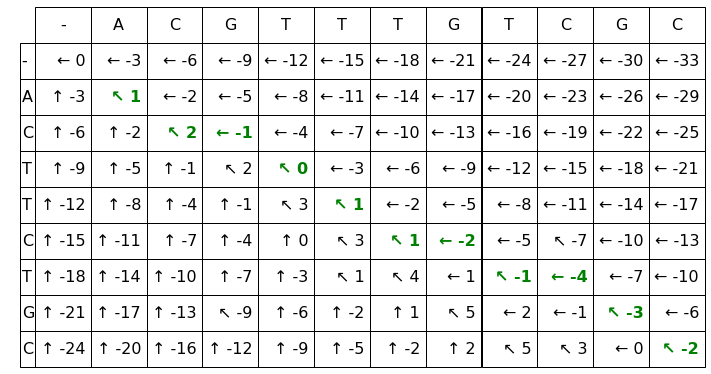

In [9]:
visual_scoring_matrix(s1, s2, score_mat, arrow_mat)

Let's generate some sequences and see how fast this is

In [10]:
def random_dna_seq(length=1000):
    seq = [random.choice(dbet) for x in range(length)]
    return ''.join(seq)

def mutate_dna_seq(seq, chance=1/5):
    mut_seq_base = [random.choice(dbet) if random.random() < chance else x for x in seq]
    mut_seq_indel = [random.choice(('', x + random.choice(dbet))) if random.random() < chance else x for x in mut_seq_base]
    return ''.join(mut_seq_indel)

In [11]:
s1 = random_dna_seq()
s2 = mutate_dna_seq(s1)
print(s1)
print(s2)
a = %timeit -o nw_alignment(dna_sub_mat, dbet, s1, s2, gap=-3)
print('{:.1f} years for the whole genome'.format(a.average * 2300000000 / 60 / 60 / 24 / 365.25))

AATCTACTTTCCTTAGTCTTCATGTAGCCCCTCGGTCAAGTCCTCTTATCCCTATCGTAAATGCCATCGTGAGTTTAGTTCATGTGCGTTGTGGTAACATGTATACGTATGCGGGAGCTGAGTCTCACGAAAACGAGTTCAAGCATTTCAATGAGTCCAATGTGCTTTATATTGACTGTTCTCAGTCTGTCATATCGCTGCGCCGCCTCTTATCAATGTAGGTAACGGCGTAGAGTGCACACGAATCGTCAAGTTACTCCCATCTCCATTTTTACGCGGTAATATGTCATGCACGCCGATACAGATAAAAGGGGCGTGGACGGGCCACGAATGACTACCCTGTGGGCGTATCGCAAGTTGCGTAAATCCGCTCACGAGTCCCATCGAGCATTCACCCATATGACCAGCCCGATAATTATGGACGTAATATAACCTCCCATTGGGGACGTACGCGACCTCCATTTGTGGAAAGATGGTTCGGTTGCTGACTCAAATGATAAAACTCCTGTACGGCGTTGACACAAACCTCCTTGCCCTGTCTCTATGGCATCCAACGTTGTTCTTCAACTGCGCCGTCTCGTAATGCAGCTATAAGTTCCACCTTGAACCGCGTTCAGCGGTTCTTCTTTCCACTGTGAATTTTAAAAAAGTTTCATCCTCGATGTATAGCGTTCCGACGGGCACTTAAGAAAGGGGCTTCGAGCCGGCCCATCGATAAAGACGATTAAGTACGGTAACGAGGCCCCGGGGGATGTATGTATAGCACGCTACTGCGTGGATGTTCCAGAACATGGGTTCGTAGTCCCGACGCGCTGCCGGCCCCTGTTTTCGTTCTTGCTATCTGAGCGCTTGTTTTCGCGTGTATCAGCTTTATGCACATAATAAAAAGTGATGCAGAGATAAGTTCTTCTAATCTGACAGGGAATAAATGAGTGCCCGATGGACTGGGTCACTTAATGGCATCTGCCTTCCGAGAGTAAAGGTGCCATTTCCACTCTTT

If we wanted to shift this one position at a time along the whole genome and check the alignments, how long would it take?

That's a long time!

Let's make it faster! (Just because)

So in reality, we don't actually want to use this algorithm to align our fragments to the whole genome. It's too slow, and there's no good way to decide which alignment is "best." It's still a good introduction to thinking about these types of problems, though. And since it's actually fairly easy and demonstrates how you can improve your code by understanding your algorithm, we'll do something to make it a bit faster.

||-|A|C|G|T|T|T|G|T|C|G|C|
|-|
|__-__|0|←-3|←-6|←-9|←-12|←-15|←-18|←-21|←-24|←-27|←-30|←-33|
|__A__|↑-3|↖1|←-2||||||||||
|__C__|↑-6|↑-2|||||||||||
|__T__|↑-9||||||||||||
|__T__|↑-12||||||||||||
|__T__|↑-15||||||||||||
|__C__|↑-18||||||||||||
|__T__|↑-21||||||||||||
|__G__|↑-24||||||||||||
|__C__|↑-27||||||||||||

We can't calculate a whole row or column at a time because the values depend on those in the same row/column. But what about diagonals?

If you look at the diagonals, you know the values above and to the left, so you have everything you need to calculate your score.

We'll "get rid of" our nested loop (really just abstract it into a faster numpy "loop")

This is going to take a couple more steps, but it will be worth it in the end.

First we pre-calculate the "upper-left score" for each location.

In [12]:
def sub_values(sub_mat, abet, seq1, seq2):
    # convert the sequences to numbers
    seq1_ind = [abet.index(i) for i in seq1]
    seq2_ind = [abet.index(i) for i in seq2]
    sub_vals = np.array([[0] * (len(seq2)+1)] + [[0] + [sub_mat[y, x] for x in seq2_ind] for y in seq1_ind], int)
    return sub_vals

sub_values(dna_sub_mat, dbet, 'AACGTTA', 'AAGCTTAAAAAAAA')

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]])

Then we get a list of all the diagonals in the matrix.

In [13]:
def diags(l1, l2):
    ys = np.array([np.arange(l1) + 1 for i in np.arange(l2)])
    xs = np.array([np.arange(l2) + 1 for i in np.arange(l1)])
    diag_ys = [np.flip(ys.diagonal(i), 0) for i in range(1-l2, l1)]
    diag_xs = [xs.diagonal(i) for i in range(1-l1, l2)]
    index_list = []
    for y, x in zip(diag_ys, diag_xs):
        index_list.append([y, x])
    return index_list

diags(6, 3)

[[array([1]), array([1])],
 [array([2, 1]), array([1, 2])],
 [array([3, 2, 1]), array([1, 2, 3])],
 [array([4, 3, 2]), array([1, 2, 3])],
 [array([5, 4, 3]), array([1, 2, 3])],
 [array([6, 5, 4]), array([1, 2, 3])],
 [array([6, 5]), array([2, 3])],
 [array([6]), array([3])]]

And here's the actual function. It takes the same arguments and produces the same matrices.

In [14]:
def FastNW(sub_mat, abet, seq1, seq2, gap=-8):
    sub_vals = sub_values(sub_mat, abet, seq1, seq2)
    # Get the lengths of the sequences
    seq1_len, seq2_len = len(seq1), len(seq2)
    # Create the scoring and arrow matrices
    score_mat = np.zeros((seq1_len+1, seq2_len+1), int)
    arrow_mat = np.zeros((seq1_len+1, seq2_len+1), int)
    # Fill first column and row of score matrix with scores based on gap penalty
    score_mat[0] = np.arange(seq2_len+1) * gap
    score_mat[:,0] = np.arange(seq1_len+1) * gap
    # Fill top row of arrow matrix with ones (left arrow)
    arrow_mat[0] = np.ones(seq2_len+1)
    # Get the list of diagonals
    diag_list = diags(seq1_len, seq2_len)
    # fill in the matrix
    for diag in diag_list:
        # Matrix to hold all three possible scores for every element in the diagonal
        f = np.zeros((3, len(diag[0])), float)
        # Cell above + gap penalty for every cell in the diagonal
        x, y = diag[0]-1, diag[1]
        f[0] = score_mat[x, y] + gap
        # Cell to the left + gap penalty for every cell in the diagonal
        x, y = diag[0], diag[1]-1
        f[1] = score_mat[x, y] + gap
        # Cell to the upper left + alignment score for every cell in the diagonal
        x, y = diag[0]-1, diag[1]-1
        f[2] = score_mat[x,y] + sub_vals[diag]
        max_score = (f.max(0))
        max_score_pos = f.argmax(0)
        score_mat[diag] = max_score
        arrow_mat[diag] = max_score_pos
    return score_mat, arrow_mat

FastNW(dna_sub_mat, dbet, s1, s2)

(array([[    0,    -8,   -16, ..., -7824, -7832, -7840],
        [   -8,     0,    -7, ..., -7815, -7823, -7831],
        [  -16,    -8,     1, ..., -7806, -7814, -7822],
        ..., 
        [-7984, -7975, -7966, ...,   321,   328,   337],
        [-7992, -7983, -7974, ...,   313,   321,   329],
        [-8000, -7991, -7982, ...,   305,   313,   322]]),
 array([[1, 1, 1, ..., 1, 1, 1],
        [0, 2, 2, ..., 1, 1, 1],
        [0, 0, 2, ..., 1, 1, 1],
        ..., 
        [0, 0, 0, ..., 2, 0, 2],
        [0, 0, 0, ..., 0, 2, 0],
        [0, 0, 0, ..., 0, 0, 2]]))

So how much faster is it?

In [15]:
s1 = random_dna_seq()
s2 = mutate_dna_seq(s1)
a = %timeit -o nw_alignment(dna_sub_mat, dbet, s1, s2)
print('{:.1f} years for the whole genome'.format(a.average * 2300000000 / 60 / 60 / 24 / 365.25))
a = %timeit -o FastNW(dna_sub_mat, dbet, s1, s2)
print('{:.1f} years for the whole genome'.format(a.average * 2300000000 / 60 / 60 / 24 / 365.25))

9.04 s ± 369 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
658.5 years for the whole genome
589 ms ± 2.68 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
43.0 years for the whole genome


## Now why did we use the substitution matrix?

Here's how DNA translates to protein:

[Wikipedia](https://en.wikipedia.org/wiki/DNA_codon_table)

So we can align proteins, too!

In [16]:
blosum50 = np.array(
    [[ 5,-2,-1,-2,-1,-1,-1, 0,-2,-1,-2,-1,-1,-3,-1, 1, 0,-3,-2, 0],
     [-2, 7,-1,-2,-1, 1, 0,-3, 0,-4,-3, 3,-2,-3,-3,-1,-1,-3,-1,-3],
     [-1,-1, 7, 2,-2, 0, 0, 0, 1,-3,-4,-0,-2,-4,-2,-1, 0,-4,-2,-3],
     [-2,-2, 2, 8,-4, 0, 2,-1,-1,-4,-4,-1,-4,-5,-1, 0,-1,-5,-3,-4],
     [-1,-4,-2,-4,13,-3,-3,-3,-3,-2,-2,-3,-2,-2,-4,-1,-1,-5,-3,-1],
     [-1,-1, 0, 0,-3, 7, 2,-2, 1,-3,-2, 2, 0,-4,-1,-0,-1,-1,-1,-3],
     [-1, 0, 0, 2,-3, 2, 6,-3, 0,-4,-3, 1,-2,-3,-1,-1,-1,-3,-2,-3],
     [ 0,-3, 0,-1,-3,-2,-3, 8,-2,-4,-4,-2,-3,-4,-2, 0,-2,-3,-3,-4],
     [-2, 0, 1,-1,-3, 1, 0,-2,10,-4,-3, 0,-1,-1,-2,-1,-2,-3,-1, 4],
     [-1,-4,-3,-4,-2,-3,-4,-4,-4, 5, 2,-3, 2, 0,-3,-3,-1,-3,-1, 4],
     [-2,-3,-4,-4,-2,-2,-3,-4,-3, 2, 5,-3, 3, 1,-4,-3,-1,-2,-1, 1],
     [-1, 3, 0,-1,-3, 2, 1,-2, 0,-3,-3, 6,-2,-4,-1, 0,-1,-3,-2,-3],
     [-1,-2,-2,-4,-2, 0,-2,-3,-1, 2, 3,-2, 7, 0,-3,-2,-1,-1, 0, 1],
     [-3,-3,-4,-5,-2,-4,-3,-4,-1, 0, 1,-4, 0, 8,-4,-3,-2, 1, 4,-1],
     [-1,-3,-2,-1,-4,-1,-1,-2,-2,-3,-4,-1,-3,-4,10,-1,-1,-4,-3,-3],
     [ 1,-1, 1, 0,-1, 0,-1, 0,-1,-3,-3, 0,-2,-3,-1, 5, 2,-4,-2,-2],
     [ 0,-1, 0,-1,-1,-1,-1,-2,-2,-1,-1,-1,-1,-2,-1, 2, 5,-3,-2, 0],
     [-3,-3,-4,-5,-5,-1,-3,-3,-3,-3,-2,-3,-1, 1,-4,-4,-3,15, 2,-3],
     [-2,-1,-2,-3,-3,-1,-2,-3, 2,-1,-1,-2, 0, 4,-3,-2,-2, 2, 8,-1],
     [ 0,-3,-3,-4,-1,-3,-3,-4,-4, 4, 1,-3, 1,-1,-3,-2, 0,-3,-1, 5]])
pbet = 'ARNDCQEGHILKMFPSTWYV'

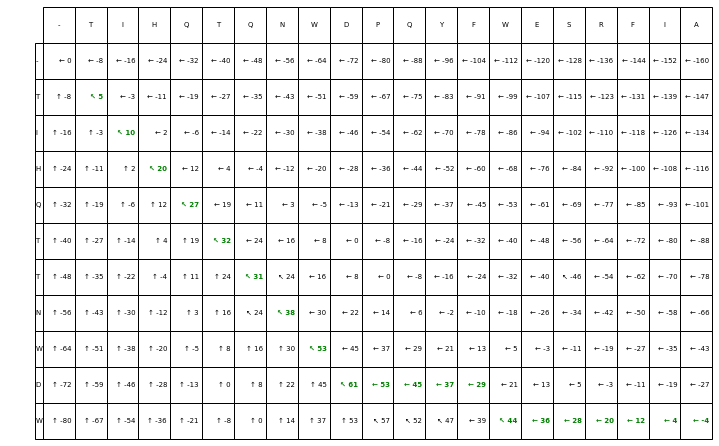

In [17]:
s1 = [random.choice(pbet) for _ in range(10)]
s2 = [random.choice(pbet) if random.random() < .25 else x for x in s1] + [random.choice(pbet) for _ in range(10)]
score_mat, arrow_mat = FastNW(blosum50, pbet, s1, s2)
visual_scoring_matrix(s1, s2, score_mat, arrow_mat)


## Other things we can do with this algorithm:
* Local alignment
* Affine gap penalties

## Other useful bioinformatics Python packages:

In [18]:
from pysam import FastaFile
from os.path import getsize

print(getsize('Homo_sapiens.GRCh38.dna.primary_assembly.fasta.gz')/1024**2, 'MiB')


with FastaFile('Homo_sapiens.GRCh38.dna.primary_assembly.fasta.gz') as myfasta:
    chr17len = myfasta.get_reference_length('17')
    print(chr17len, 'bp')
    seq = myfasta.fetch('17', int(chr17len/2), int(chr17len/2)+500)
print(seq)

853.3953523635864 MiB
83257441 bp
TGTTATTCTTTTGCGCCTGTTGCTGTCCCTAGGATACCGGAGATACTCAGCCTGTGCTTGCCAAGGGTATACATATGTATTCAAATACGCACATCCTGTAAACAGCTGTGGTGGAAACCCAAGACCAGACTTGTAGAGACCTGGATCTATTTTGCAGGCCACAGTGAAGGGCTGTGTGAGCTTGAGTCCTCTCTGAGCCTCACGTTTTACATCTAAAACATGAGGGGCTGGTCCAACTGGTTTCCAAAAGTCCTTCCAACTGGGACAGCCTGTGGATCTGCCAGTGCTCCAGCTGCACCAGCATGCAGCACATGTGCCCACACGTGTACACACCTGCTTACGCACGGCCACCCACCATGCTGAAGAACCAGCCCTCGGCATCCTTGCAGCTCTTCTCCACCAATGTCTTGTCCTGGTCACGCATCTCATTCAGGATGCAGCTCAGGTTCACTCCAGGCACAGTGTCCATCTTCACACTGACATCCTCATCCACCTGACCT


In [19]:
with FastaFile('Homo_sapiens.GRCh38.dna.primary_assembly.fasta.gz') as myfasta:
    chr17len = myfasta.get_reference_length('17')
    %timeit myfasta.fetch('17', int(chr17len/2), int(chr17len/2)+500)

203 µs ± 1.11 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [20]:
from Bio.Seq import Seq
from Bio.Alphabet import IUPAC
coding_dna = Seq("ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG", IUPAC.unambiguous_dna)
print(coding_dna.__repr__())
print(coding_dna.translate().__repr__())

Seq('ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG', IUPACUnambiguousDNA())
Seq('MAIVMGR*KGAR*', HasStopCodon(IUPACProtein(), '*'))


## Any questions?

## Other possible topics:
How do you actually get from reads to something usable?
![gatk_call_variants_old](images/gatk_call_variants_old.png)


Why does bioinformatics use flat files and not databases for everything?
The best answer I can give is that of Heng Li when talking about Tabix:
> It is straightforward to achieve overlap queries using the standard B-tree index (with or without binning) implemented in all SQL databases, or the R-tree index in PostgreSQL and Oracle. But there are still many reasons to use tabix. Firstly, tabix directly works with a lot of widely used TAB-delimited formats such as GFF/GTF and BED. We do not need to design database schema or specialized binary formats. Data do not need to be duplicated in different formats, either. Secondly, tabix works on compressed data files while most SQL databases do not. The GenCode annotation GTF can be compressed down to 4%. Thirdly, tabix is fast. The same indexing algorithm is known to work efficiently for an alignment with a few billion short reads. SQL databases probably cannot easily handle data at this scale. Last but not the least, tabix supports remote data retrieval. One can put the data file and the index at an FTP or HTTP server, and other users or even web services will be able to get a slice without downloading the entire file.

What things can you do in bioinformatics?
* Look at variants - which ones matter?
* Assemble genomes for new organisms
* Compare genomes of different organisms
* Biomarker studies:
 * Compare gene expression levels across case and control samples, see if you can find significantly different ones. (It's messy. Also, R is better for this than Python (shhh...))
* Molecular interaction networks